In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [89]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [90]:
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [91]:
df = pd.DataFrame(data={"revenue": revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


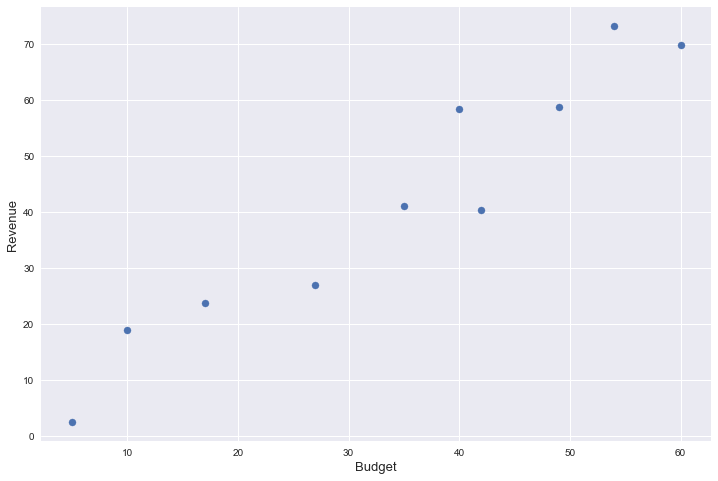

In [92]:
plt.figure(figsize= (12, 8))
plt.scatter(x= df.budget, y= df.revenue, s= 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize= 13)
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lm = LinearRegression(fit_intercept = True)

In [95]:
lm.fit(X= df.budget.to_frame(), y= df.revenue)

LinearRegression()

In [96]:
slope = lm.coef_
slope

array([1.19897684])

In [97]:
intercept = lm.intercept_
intercept

0.7046849757673783

In [98]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [99]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin
y_lin

array([  0.70468498, 120.60236941])

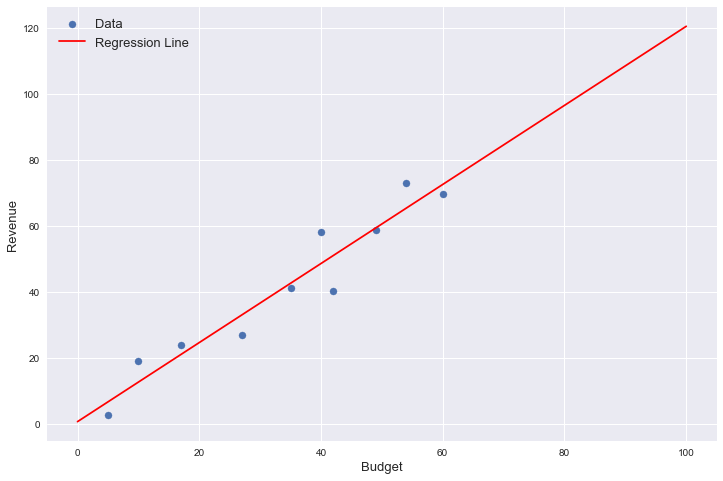

In [100]:
plt.figure(figsize= (12, 8))
plt.scatter(x= df.budget, y= df.revenue, s= 50, label= "Data")
plt.plot(x_lin, y_lin, c= "red", label= "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize= 13)
plt.legend(fontsize= 13)
plt.show()

In [101]:
budget_new = np.array([63, 66, 74, 80, 85])

In [102]:
revenue_new = np.array([74.2, 80.7, 94.8, 98.2, 101.7])

In [103]:
df_new = pd.DataFrame(data={"revenue": revenue_new, "budget":budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,94.8,74
3,98.2,80
4,101.7,85


In [104]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,94.8,74,89.428971
3,98.2,80,96.622833
4,101.7,85,102.617717


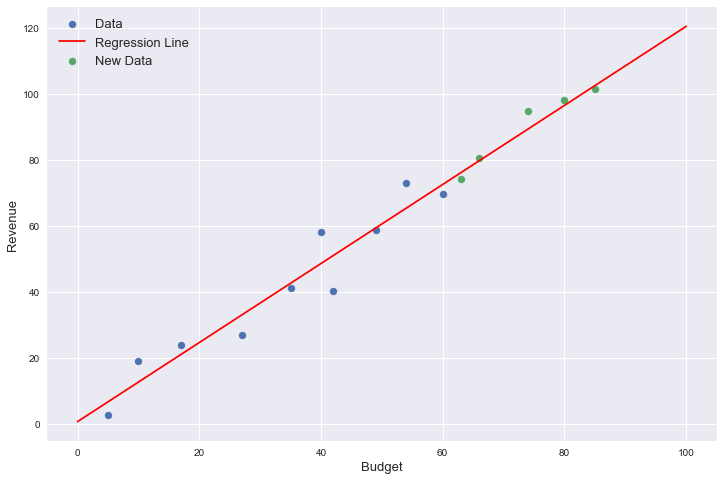

In [105]:
plt.figure(figsize= (12, 8))
plt.scatter(x= df.budget, y= df.revenue, s= 50, label= "Data")
plt.plot(x_lin, y_lin, c= "red", label= "Regression Line")
plt.scatter(x= df_new.budget, y= df_new.revenue, s= 50, label= "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize= 13)
plt.legend(fontsize= 13)
plt.show()

In [106]:
poly_m = np.polyfit(x= df.budget, y= df.revenue, deg=9)
poly_m

array([ 2.31988761e-09, -6.91663857e-07,  8.80409588e-05, -6.24271102e-03,
        2.69731803e-01, -7.29512946e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [107]:
x_poly = np.linspace(0, 100, 1000)
y_poly = np.polyval(poly_m, x_poly)

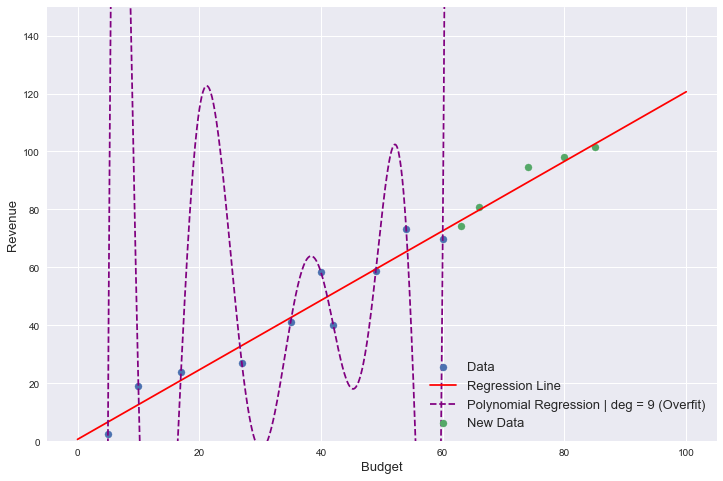

In [108]:
plt.figure(figsize= (12, 8))
plt.scatter(x= df.budget, y= df.revenue, s= 50, label= "Data")
plt.plot(x_lin, y_lin, c= "red", label= "Regression Line")
plt.plot(x_poly, y_poly, label= "Polynomial Regression | deg = 9 (Overfit)", linestyle= "--", color="purple")
plt.scatter(x= df_new.budget, y= df_new.revenue, s= 50, label= "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize= 13)
plt.legend(fontsize= 13, loc= 4)
plt.ylim(0, 150)
plt.show()

In [109]:
mean = df.revenue.mean()
mean

41.349999999999994

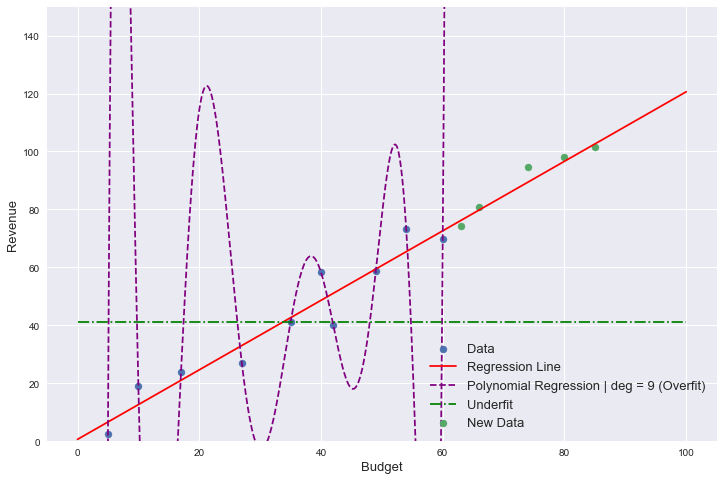

In [110]:
plt.figure(figsize= (12, 8))
plt.scatter(x= df.budget, y= df.revenue, s= 50, label= "Data")
plt.plot(x_lin, y_lin, c= "red", label= "Regression Line")
plt.plot(x_poly, y_poly, label= "Polynomial Regression | deg = 9 (Overfit)", linestyle= "--", color="purple")
plt.hlines(y= mean, xmin= 0, xmax= 100, label= "Underfit", linestyle= "-.", color="green")
plt.scatter(x= df_new.budget, y= df_new.revenue, s= 50, label= "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize= 13)
plt.legend(fontsize= 13, loc= 4)
plt.ylim(0, 150)
plt.show()